# Import Library

In [1]:
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from numpy import mean
from numpy import absolute
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Dataset

In [2]:
data = pd.read_excel("trainDataset.xls")
data.shape

(400, 120)

In [3]:
data.head()

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.0,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.0,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.0,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.0,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [4]:
data.describe()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,12.727500,56.159792,51.851171,0.540000,2.900000,2.81000,2.830000,9.880000,6.577500,8.625000,...,3.945420e-01,3.899257e-01,2.711993e+00,0.003314,5.683152e+07,176.969142,32500.032680,0.056721,0.005948,0.029385
std,111.104111,26.763774,10.864462,0.499022,49.932235,49.93649,49.935558,86.092482,70.443308,86.200962,...,1.674769e-01,1.624792e-01,7.556631e-01,0.002412,7.063822e+08,1045.305721,177545.921557,0.047363,0.008416,0.115909
min,0.000000,5.000000,23.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,0.000000,38.000000,44.616016,0.000000,0.000000,0.00000,0.000000,2.000000,1.000000,1.000000,...,3.199017e-01,3.175584e-01,2.330664e+00,0.001334,1.078546e+06,18.628013,0.001851,0.018628,0.000310,0.001535
50%,0.000000,55.041667,51.119781,1.000000,0.000000,0.00000,0.000000,2.000000,1.000000,1.000000,...,4.095627e-01,4.054695e-01,2.807355e+00,0.002888,3.366594e+06,66.507214,0.004399,0.047029,0.002301,0.003384
75%,1.000000,73.000000,60.000000,1.000000,1.000000,1.00000,1.000000,3.000000,2.000000,1.000000,...,5.000660e-01,4.962633e-01,3.277613e+00,0.004707,9.231697e+06,154.300334,0.013846,0.084418,0.007873,0.009558
max,999.000000,144.000000,79.603012,1.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


# Drop Unused Column

In [5]:
data = data.drop(['ID','pCR (outcome)'], axis = 1)

# Replace 999 with Nan

In [6]:
data = data.replace(999, np.nan)

In [7]:
data.isnull()

,RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#show the amount of null values in each column
pd.options.display.min_rows = 115
data.isnull().sum()

RelapseFreeSurvival (outcome)                      0
Age                                                0
ER                                                 0
PgR                                                1
HER2                                               1
TrippleNegative                                    1
ChemoGrade                                         3
Proliferation                                      2
HistologyType                                      3
LNStatus                                           1
TumourStage                                        0
original_shape_Elongation                          0
original_shape_Flatness                            0
original_shape_LeastAxisLength                     0
original_shape_MajorAxisLength                     0
original_shape_Maximum2DDiameterColumn             0
original_shape_Maximum2DDiameterRow                0
original_shape_Maximum2DDiameterSlice              0
original_shape_Maximum3DDiameter              

In [9]:
#total amount of null values
data.isnull().sum().sum()

12

# Fill in the null values using KNNImputer

In [10]:
knnimputer = KNNImputer(n_neighbors=5)
data.iloc[:,:] = knnimputer.fit_transform(data)
# data.to_excel('KNNImputer.xlsx')

# Define x and y

In [11]:
#define x by removing the column of 'RelapseFreeSurvival (outcome)' 
x = data.drop(['RelapseFreeSurvival (outcome)'], axis = 1)

#define y by keeping the column of 'RelapseFreeSurvival (outcome)' 
y = data['RelapseFreeSurvival (outcome)']

# Sequential Backward Selection

In [12]:
cv = KFold(n_splits=5, random_state = 1, shuffle = True,)
regressor_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=7))

In [13]:
sfs1 = SFS(regressor_pipeline,
          k_features = 1,
          forward = False,
          scoring='neg_mean_absolute_error',
          cv=cv,
          n_jobs = -1)

sfs1.fit(x,y)

SequentialFeatureSelector(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                          estimator=Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('kneighborsregressor',
                                                     KNeighborsRegressor(n_neighbors=7))]),
                          forward=False, k_features=(1, 1), n_jobs=-1,
                          scoring='neg_mean_absolute_error')

In [14]:
# Show the average of MAE for each combination of feature
sfs1.subsets_

{117: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   112,
   113,
   114,
   115,
   116),
  'cv_scores': array([-20.85639881, -22.52857143, -21.10193452, -21.76011905,
         -22.28214286]),
  'avg_score': -21.70583333333333,
  'feature_name

In [15]:
#Make a dataframe for the average MAE of every combination
results = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

#Convert feature_name has the best scoring into list
pd.options.display.max_colwidth = 10000
maxvalue = results['avg_score'].max()

r = results[results['avg_score']==maxvalue]
r=r.iloc[-1:]
featureNames = r['feature_names'].to_string()

featureNames = featureNames.split(' ', 1)[-1]
featureNames = featureNames.replace('(', '')
featureNames = featureNames.replace(')', '')
featureNames = featureNames.replace(' ', '')

List=featureNames.split(',')
print(List)

['Age', 'ER', 'ChemoGrade', 'Proliferation', 'LNStatus', 'original_shape_Maximum2DDiameterColumn', 'original_shape_Sphericity', 'original_shape_SurfaceVolumeRatio', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Median', 'original_firstorder_Minimum', 'original_firstorder_Skewness', 'original_glcm_Contrast', 'original_glcm_Correlation', 'original_glcm_Imc2', 'original_glcm_SumEntropy', 'original_gldm_LargeDependenceEmphasis', 'original_gldm_SmallDependenceHighGrayLevelEmphasis', 'original_glrlm_GrayLevelNonUniformityNormalized', 'original_glszm_SmallAreaEmphasis', 'original_glszm_SmallAreaHighGrayLevelEmphasis', 'original_glszm_SmallAreaLowGrayLevelEmphasis', 'original_glszm_ZoneEntropy', 'original_glszm_ZonePercentage']


In [16]:
# Drop the other unrelated features

X = data.drop(columns = 'RelapseFreeSurvival (outcome)')[List]

In [17]:
# Determine the new shape of the input variable
X.shape

(400, 26)

# Hyperparameter Optimisation

In [18]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('KNR', KNeighborsRegressor())])

In [19]:
param_grid = {
    'KNR__n_neighbors': [1,2,3,4,5,6,7,8,9,10]
}

In [20]:
#GridSearch by changing the n_neighbors
gs = GridSearchCV(pipe, 
                  param_grid=param_grid, 
                  scoring='neg_mean_absolute_error', 
                  n_jobs=-1, 
                  cv=cv,
                  refit=False)

In [21]:
gs.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('KNR', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'KNR__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             refit=False, scoring='neg_mean_absolute_error')

In [22]:
print('Best parameters found:\n', gs.best_params_)


Best parameters found:
 {'KNR__n_neighbors': 7}


# Normalize data before tuning hyperparameter

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split test data and train data

In [24]:
Xs_train, Xs_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
optimised_model = pipe.set_params(**gs.best_params_).fit(Xs_train, y_train)

# Using K-fold Cross Validation to determine the Result of Model with Optimised Hyperparameter 

In [26]:
#K-Fold R2 Score
r2_scores = cross_val_score(optimised_model, X, y, scoring='r2', cv=cv, n_jobs=-1)
print("K-Fold R2 score =", round(mean(r2_scores),2))

K-Fold R2 score = 0.1


In [27]:
#K-Fold Mean Squared Error 
MSE = cross_val_score(optimised_model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("K-Fold Mean Squared Error =", round(mean(absolute(MSE)),2))

K-Fold Mean Squared Error = 646.66


In [28]:
#K-Fold Root Mean Squared Error 
MSE = cross_val_score(optimised_model, X, y, scoring='neg_root_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("K-Fold Root Mean Squared Error =", round(mean(absolute(MSE)),2))

K-Fold Root Mean Squared Error = 25.39


In [29]:
#K-Fold Mean Absolute Error 
MAE = cross_val_score(optimised_model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print("K-Fold Mean Absolute Error =", round(mean(absolute(MAE)),2))

K-Fold Mean Absolute Error = 19.31


# Difference between prediction set and test set

In [30]:
y_pred = optimised_model.predict(Xs_test)

In [31]:
# Compare the difference between the predicted value and actual value
pred_data = pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Difference':y_test-y_pred})

print(pred_data)

         Actual  Predicted  Difference
398   46.916667  48.428571   -1.511905
125   45.000000  50.428571   -5.428571
328   31.000000  57.857143  -26.857143
339   75.583333  63.976190   11.607143
172   13.000000  61.892857  -48.892857
342   73.166667  47.547619   25.619048
197   57.000000  52.083333    4.916667
291   37.000000  57.642857  -20.642857
29   105.000000  81.714286   23.285714
284   40.000000  57.488095  -17.488095
174   36.000000  49.452381  -13.452381
372   58.416667  64.047619   -5.630952
188   58.000000  49.154762    8.845238
324   35.000000  59.833333  -24.833333
321   31.000000  54.190476  -23.190476
227   50.000000  64.119048  -14.119048
371   59.000000  42.714286   16.285714
5    135.000000  59.964286   75.035714
78    87.000000  43.714286   43.285714
223   50.000000  56.714286   -6.714286
122   74.000000  76.059524   -2.059524
242   45.000000  46.428571   -1.428571
382   56.250000  45.428571   10.821429
214   53.000000  50.583333    2.416667
17    20.000000  55.01190

# Plot the graph of actual and predicted diagram to visualize

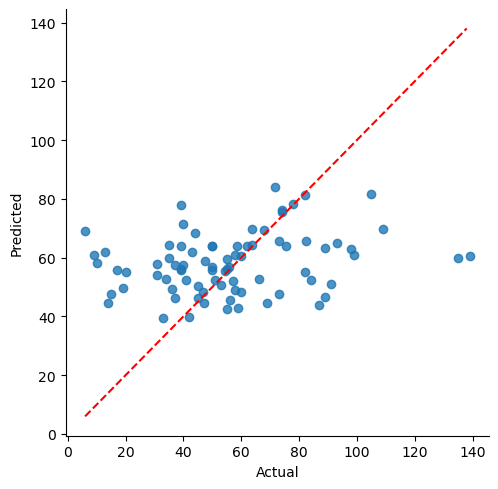

In [32]:
data_results = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
sns.lmplot(x='Actual',y='Predicted',data=data_results,fit_reg=False)
d_line= np.arange(data_results.min().min(), data_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.show()

# Save the feature selected that allow model to perform better and generate best result

In [33]:
best_features = pd.DataFrame(List)
best_features.columns = ['best_features']
best_features

,best_features
0,Age
1,ER
2,ChemoGrade
3,Proliferation
4,LNStatus
5,original_shape_Maximum2DDiameterColumn
6,original_shape_Sphericity
7,original_shape_SurfaceVolumeRatio
8,original_firstorder_InterquartileRange
9,original_firstorder_Kurtosis


In [34]:
# Save the features selected into csv file to load in test file
best_features.to_csv('KNN_SBS_best_feature.csv',index=False)

# Save the mode for prediction in test file

In [36]:
import pickle

best_model = optimised_model
file_name = 'KNN_SBS_best_model.sav'
pickle.dump(best_model, open(file_name,'wb'))